# <font color='green'> Data Visualization </font>
# <font color='Blue'> Part One </font>

## <font color='Blue'> Author Details </font>

In [3]:
from datetime import datetime

data_e_hora_atuais = datetime.now()
data_e_hora_em_texto = data_e_hora_atuais.strftime('%d/%m/%Y')

print('Criado o dia: ', data_e_hora_em_texto)
print('Autor: Dr. Marcos A. Albarracin Manrique') 

Criado o dia:  31/08/2024
Autor: Dr. Marcos A. Albarracin Manrique


## <font color='blue'> Description </font>

> We will model the data from the file 'GoalsInLeague.txt'. This file contains the results of a number of football matches from a certain football league. The first line of the file stores the number of goals scored by the home teams and the second line stores the number of goals scored by the visiting teams.

## <font color='blue'> Loading the Required Packages </font>

In [7]:
import matplotlib.pyplot as plt                    
from matplotlib.ticker import MultipleLocator      
from matplotlib.ticker import FormatStrFormatter
from matplotlib.patches import Rectangle
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib widget

- **In case we want to customize the graphics, we can use 'style'.**

In [9]:
#print(plt.style.available) 
plt.style.use("Solarize_Light2")

## <font color='blue'> Opening, Reading, Formatting the File and Storing Data in Lists </font> 

In [11]:
with open("GoalsInLeague.txt", "r") as dataGoals:
    # First line
    TheHomeTeam = dataGoals.readline()
    TheHomeTeam = TheHomeTeam.strip(" \n") # Extra space + \n
    TheHomeTeam = TheHomeTeam.split(" ")

    TheHomeTeamGoals = [int(x) for x in TheHomeTeam]

    # Second Line
    TheVisitingTeam = dataGoals.readline()
    TheVisitingTeam = TheVisitingTeam.strip(" \n")
    TheVisitingTeam = TheVisitingTeam.split(" ")

    TheVisitingTeamGoals = [int(x) for x in TheVisitingTeam]

In [12]:
#print(TheHomeTeamGoals)
#print(TheVisitingTeamGoals)

## <font color='blue'> Scatter Plot </font> 

- 'scatter plot' is not a good graph, as it does not tell us how many times the score occurs, but we can still explore this graph.

- We can create a function to create a list of custom and segregated colors for each result based on the distance between coordinates of a point on the Cartesian plane.

In [16]:
def distFromZero(THTG, TVTG): 
    return math.sqrt(THTG**2 + TVTG**2)

color = []

for i in range(len(TheVisitingTeamGoals)):
    color.append(distFromZero(TheVisitingTeamGoals[i], 
                              TheVisitingTeamGoals[i]))

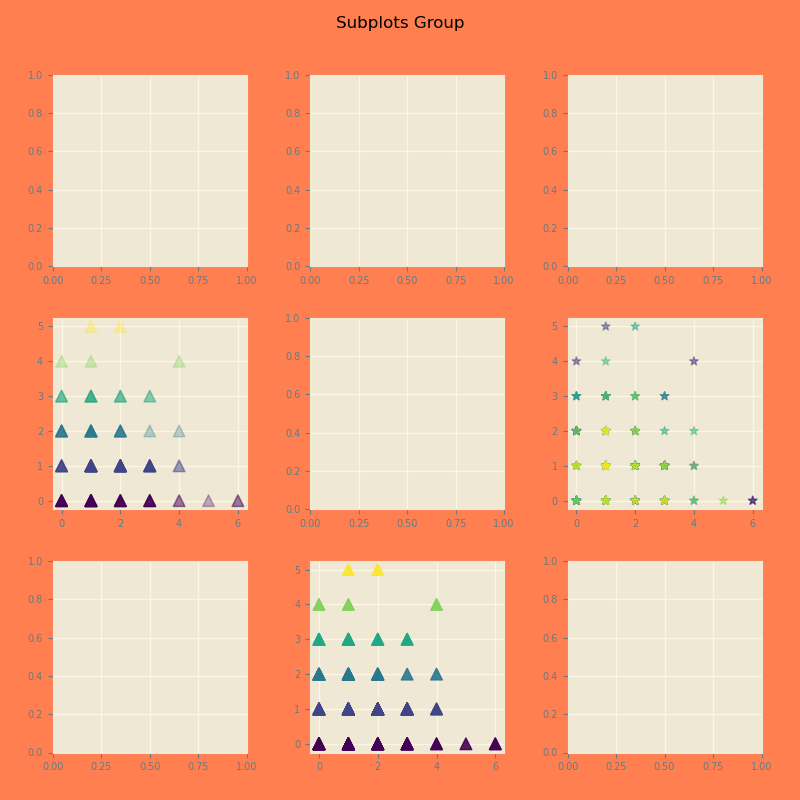

In [23]:
fig1 = plt.figure("MyFirstFigure", figsize = (8, 8), facecolor = 'coral') #(width, height)
#fig1 = plt.figure(1, figsize = (10, 6), facecolor = 'beige') #(width, height)
#fig2 = plt.figure(2, figsize = (10, 10), facecolor = 'red') #(width, height)
#fig2 = plt.figure("MySecondFigure", figsize = (10, 10), facecolor = 'orchid') #(width, height)

# Call a specific figure
# plt.figure("MySecondFigure")  # plt.figure(1), plt.figure(2), plt.figure("MySecondFigure")  

# Creating subplots
#ax1 = fig2.add_subplot(3, 3, 2) #mrows, ncolumns, 1 <= index <= mrows*ncolumns
#ax2 = fig2.add_subplot(3, 3, 6)
#ax3 = fig2.add_subplot(3, 1, 3)
#ax4 = fig2.add_subplot(3, 3, 9)

axList = []
for i in range(1, 10):
    axList.append(fig1.add_subplot(3, 3, i))
    plt.xticks(fontsize = 7) 
    plt.yticks(fontsize = 7)

plt.sca(axList[3])
#plt.scatter(x = TheHomeTeamGoals, y = TheVisitingTeamGoals, s = 10, c = 'c') #c='#0F0F0F','black',[[1,0,.4,.9]],[[1,0.2,.3],'#0F0F0F',"g"]
plt.scatter(TheHomeTeamGoals, 
            TheVisitingTeamGoals, 
            s = 70, 
            c = color, # c = TheHomeTeamGoals, TheVisitingTeamGoals, range(len(TheVisitingTeamGoals)) (array or list of colors) 
            marker = '^',  # marker = 'o', '*'
            alpha = 0.3)   # alpha < 1.0

axList[5].scatter(TheHomeTeamGoals, TheVisitingTeamGoals, s = 40, 
            c = range(len(TheHomeTeamGoals)), marker = "*", alpha = 0.5)

plt.sca(axList[7])
plt.scatter(TheHomeTeamGoals, 
            TheVisitingTeamGoals, 
            s = 70, 
            c = color, # c = TheHomeTeamGoals, TheVisitingTeamGoals, range(len(TheVisitingTeamGoals)) (array or list of colors) 
            marker = '^',  # marker = 'o', '*'
            alpha = 0.9)   # alpha < 1.0

fig1.suptitle('Subplots Group', fontsize = 12) 

fig1.tight_layout(pad = 2.0)

plt.show()